In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import warnings
warnings.filterwarnings('ignore')

import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

g = torch.load('matrices/g.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
W, d = g.shape

filenames = []
with open('matrices/filenames.txt', 'r') as f:
    for line in f.readlines():
        filenames.append(line.strip())

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for line in f.readlines():
        concept_names.append(line.strip())

Loading checkpoint shards: 100%|██████████| 2/2 [00:22<00:00, 11.19s/it]


In [3]:
# matrices/g.gt
print(g.shape)
g

torch.Size([32000, 4096])


tensor([[ 0.1251, -0.2941, -0.1777,  ...,  0.0623,  0.0170, -0.4608],
        [-1.1194,  1.9887,  0.0705,  ..., -1.4700,  2.2703,  0.6281],
        [-1.1231,  0.7729,  1.7594,  ..., -2.6730,  0.8834, -0.4264],
        ...,
        [-1.8651, -1.4565, -0.1221,  ...,  0.5645, -0.0761, -2.2476],
        [ 1.9556,  0.9917,  1.7593,  ...,  0.5505, -0.1753, -1.0072],
        [ 1.1734, -1.1121,  0.5380,  ..., -2.1610, -0.7749,  0.8948]],
       device='cuda:0')

In [4]:
# matrices/concept_g.gt
print(concept_g.shape)
concept_g

torch.Size([27, 4096])


tensor([[-0.0055,  0.0144,  0.0112,  ..., -0.0068, -0.0234, -0.0096],
        [-0.0066, -0.0091,  0.0097,  ..., -0.0112,  0.0381,  0.0076],
        [-0.0052,  0.0283,  0.0142,  ..., -0.0213,  0.0167, -0.0074],
        ...,
        [ 0.0074,  0.0171,  0.0071,  ...,  0.0002, -0.0121, -0.0015],
        [-0.0021, -0.0005, -0.0068,  ...,  0.0239,  0.0028,  0.0083],
        [-0.0279, -0.0143, -0.0023,  ..., -0.0073, -0.0243, -0.0029]],
       device='cuda:0')

In [5]:
for fn in filenames:
    print(fn)

word_pairs/[verb - 3pSg].txt
word_pairs/[verb - Ving].txt
word_pairs/[verb - Ved].txt
word_pairs/[Ving - 3pSg].txt
word_pairs/[Ving - Ved].txt
word_pairs/[3pSg - Ved].txt
word_pairs/[verb - V + able].txt
word_pairs/[verb - V + er].txt
word_pairs/[verb - V + tion].txt
word_pairs/[verb - V + ment].txt
word_pairs/[adj - un + adj].txt
word_pairs/[adj - adj + ly].txt
word_pairs/[small - big].txt
word_pairs/[thing - color].txt
word_pairs/[thing - part].txt
word_pairs/[country - capital].txt
word_pairs/[pronoun - possessive].txt
word_pairs/[male - female].txt
word_pairs/[lower - upper].txt
word_pairs/[noun - plural].txt
word_pairs/[adj - comparative].txt
word_pairs/[adj - superlative].txt
word_pairs/[frequent - infrequent].txt
word_pairs/[English - French].txt
word_pairs/[French - German].txt
word_pairs/[French - Spanish].txt
word_pairs/[German - Spanish].txt


In [6]:
print(len(concept_names))
for cn in concept_names:
    print(cn)

27
$verb \Rightarrow 3pSg$
$verb \Rightarrow Ving$
$verb \Rightarrow Ved$
$Ving \Rightarrow 3pSg$
$Ving \Rightarrow Ved$
$3pSg \Rightarrow Ved$
$verb \Rightarrow V + able$
$verb \Rightarrow V + er$
$verb \Rightarrow V + tion$
$verb \Rightarrow V + ment$
$adj \Rightarrow un + adj$
$adj \Rightarrow adj + ly$
$small \Rightarrow big$
$thing \Rightarrow color$
$thing \Rightarrow part$
$country \Rightarrow capital$
$pronoun \Rightarrow possessive$
$male \Rightarrow female$
$lower \Rightarrow upper$
$noun \Rightarrow plural$
$adj \Rightarrow comparative$
$adj \Rightarrow superlative$
$frequent \Rightarrow infrequent$
$English \Rightarrow French$
$French \Rightarrow German$
$French \Rightarrow Spanish$
$German \Rightarrow Spanish$


In [7]:
# compute the projections on concept directions
inner_product_with_counterfactual_pairs_g_LOO = []
count = 0
for filename in filenames:
    base_ind, target_ind, base_name, target_name = lrg.get_counterfactual_pairs(filename)
    inner_product_LOO, diff_data = lrg.inner_product_loo(base_ind, target_ind, g)
    inner_product_with_counterfactual_pairs_g_LOO.append(inner_product_LOO)
    count += 1

In [8]:
print(len(inner_product_with_counterfactual_pairs_g_LOO))
for i in range(len(inner_product_with_counterfactual_pairs_g_LOO)):
    print(inner_product_with_counterfactual_pairs_g_LOO[i].shape)
inner_product_with_counterfactual_pairs_g_LOO

27
torch.Size([32])
torch.Size([31])
torch.Size([47])
torch.Size([27])
torch.Size([34])
torch.Size([29])
torch.Size([6])
torch.Size([14])
torch.Size([8])
torch.Size([11])
torch.Size([5])
torch.Size([18])
torch.Size([20])
torch.Size([21])
torch.Size([13])
torch.Size([15])
torch.Size([4])
torch.Size([11])
torch.Size([34])
torch.Size([63])
torch.Size([19])
torch.Size([9])
torch.Size([32])
torch.Size([46])
torch.Size([35])
torch.Size([35])
torch.Size([22])


[tensor([13.6954, 14.7370, 20.1056, 21.0217, 19.8815, 14.2239, 15.5938, 13.0945,
         20.1680, 19.9323, 17.3948, 19.5773, 17.9780, 18.4769, 18.7744, 14.2491,
         20.3607, 20.6155, 21.0089, 21.2604, 13.7438, 20.3138, 17.0973, 17.0369,
         17.6863, 15.5565, 19.1972, 20.9556, 16.4129, 14.5119, 17.8325, 17.1270],
        device='cuda:0'),
 tensor([11.3050, 15.3634, 16.5003, 15.9271, 11.2240, 13.3394,  9.9652, 13.5938,
         13.8322, 12.5163, 11.4922,  9.9501,  9.6307, 14.2649, 13.7157, 14.7972,
          7.1268, 12.5559, 11.5120, 11.7883, 17.3314, 15.0030, 11.0285, 11.6095,
         13.6117, 15.8720, 17.6033,  8.2416,  7.4202,  9.8634,  5.4804],
        device='cuda:0'),
 tensor([ 9.4347, 13.3871,  9.7665,  9.6968, 11.9995, 12.4561, 12.3335, 11.0630,
          6.5747,  8.6930, 11.4079, 12.0225, 11.9381, 13.9228, 12.6026, 12.9913,
         10.3476, 11.1043,  8.2447,  7.4492,  8.3148,  6.5885, 10.7163, 11.8206,
         10.0009, 13.4530, 14.5198, 11.5994,  9.7640,  8.5236,  

In [9]:
# sample random pairs
num_sample = 100000
torch.manual_seed(100)

idx1 = torch.multinomial(torch.ones(W), num_sample, replacement=True)
idx2 = torch.multinomial(torch.ones(W), num_sample, replacement=True)
random_pairs_g = g[idx1,] - g[idx2,]

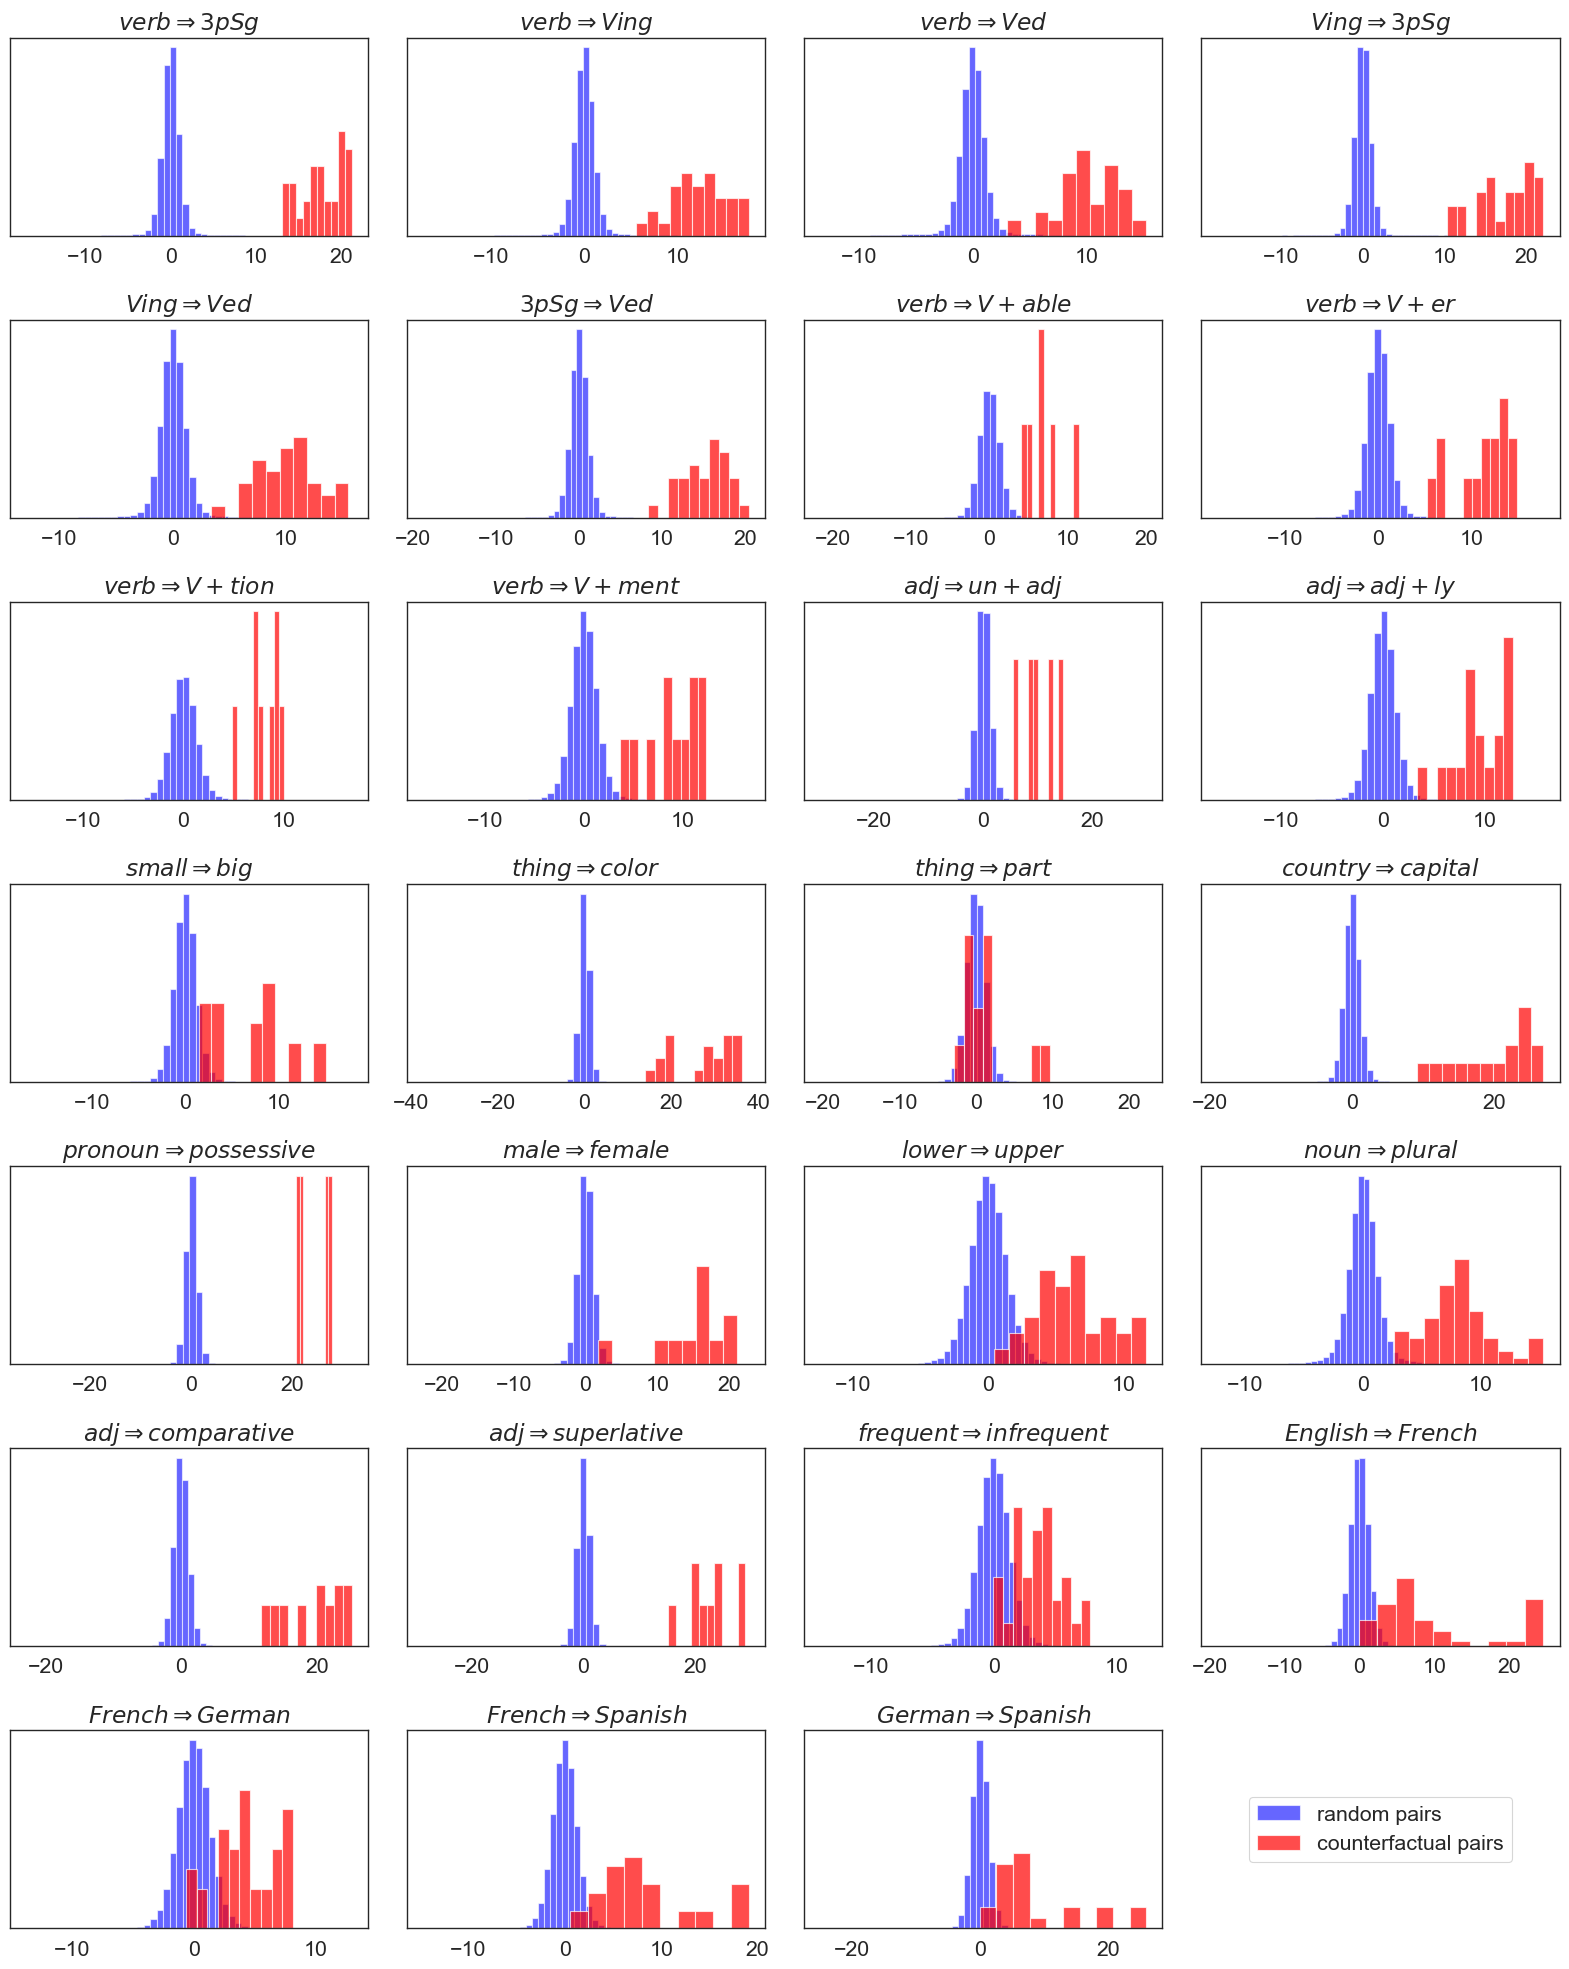

In [10]:
lrg.show_histogram_LOO(
    inner_product_with_counterfactual_pairs_g_LOO,
    random_pairs_g, 
    concept_g, 
    concept_names, 
    fig_name = "g"
)